In [2]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
import warnings
warnings.filterwarnings('ignore')

#データの読み込み
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv'

df = pd.read_csv(url)

#日本語に変換
columns = ['販売チャネル', '地域', '生鮮食品', '乳製品', '食料品',
           '冷凍食品', '洗剤_紙製品', '総菜']
df.columns = columns

In [3]:
#データ確認
display(df.head())

#サイズ確認
print(df.shape)

,販売チャネル,地域,生鮮食品,乳製品,食料品,冷凍食品,洗剤_紙製品,総菜
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


(440, 8)


In [4]:
#欠損値確認
print(df.isnull().sum())

販売チャネル    0
地域        0
生鮮食品      0
乳製品       0
食料品       0
冷凍食品      0
洗剤_紙製品    0
総菜        0
dtype: int64


In [6]:
#販売チャネルのラベル値確認
print(df['販売チャネル'].value_counts())
print()

#地域のラベル値確認
print(df['地域'].value_counts())

1    298
2    142
Name: 販売チャネル, dtype: int64

3    316
1     77
2     47
Name: 地域, dtype: int64


販売チャネルのラベル値  
1.Horeca (ホテル・レストラン・カフェ)  
2.Retail (小売り)  
  
地域のラベル値  
1.Lisborn(リズボン)  
2.Oporto(オポルト)  
3.Other Region(その他)

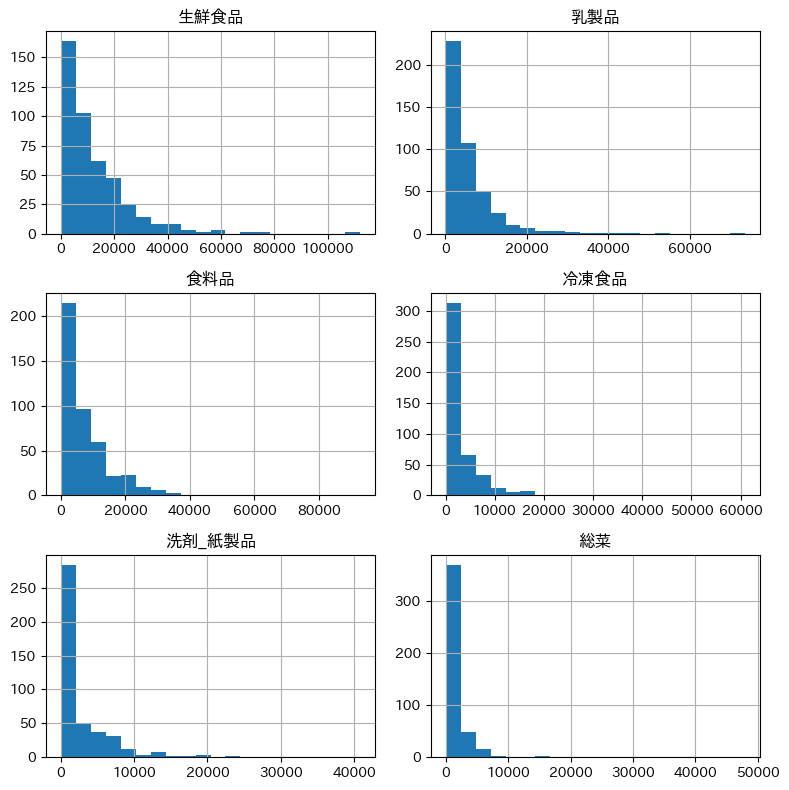

In [7]:
#販売チャネルと地域を落としたデータを作る
df2 = df.drop(['販売チャネル', '地域'], axis=1)

#分析対象項目のヒストグラム表示
from pylab import rcParams
rcParams['figure.figsize'] = (8, 8)
df2.hist(bins=20)
plt.tight_layout()
plt.show()